In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from bokeh.plotting import figure, curdoc                                                                                                                                
#from bokeh.palettes import Spectral6                                                                                                                                     
#from bokeh.models import ColumnDataSource, HoverTool, Div                                                                                                                
import argparse
import os,sys

%matplotlib inline

In [2]:
df = pd.read_csv('../data/shot_logs.csv',header=0)

In [3]:
def ConvertShotResultToInt(x):
    if x=='made':
        return 1
    else:
        return 0


In [4]:
df['MADE_INT'] = df.loc[:,'SHOT_RESULT'].apply(ConvertShotResultToInt)

In [5]:
print df.head()

    GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            1   
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            2   
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            3   
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            4   
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            5   

   PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES   ...     PTS_TYPE  SHOT_RESULT  \
0       1       1:09        10.8         2   ...            2         made   
1       1       0:14         3.4         0   ...            3       missed   
2       1       0:00         NaN         3   ...            2       missed   
3       2      11:47        10.3         2   ...            2       missed   
4       2      10:34        10.9         2   ...            2       missed   

    CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID CL

In [6]:
df_AccDist= df.loc[:,['MADE_INT',"SHOT_DIST"]].groupby( np.digitize(df.loc[:,'SHOT_DIST'],np.linspace(0,50,26)) )
#acc = df_group.loc[:,'MADE_INT'].mean()

In [7]:
acc = df_AccDist.mean()

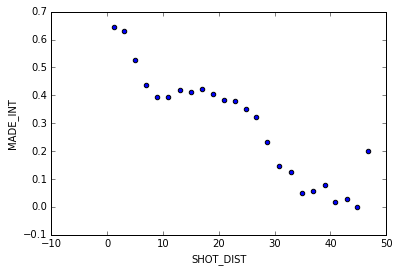

In [8]:
fig = plt.figure()

acc.plot(kind='scatter',x='SHOT_DIST',y='MADE_INT')

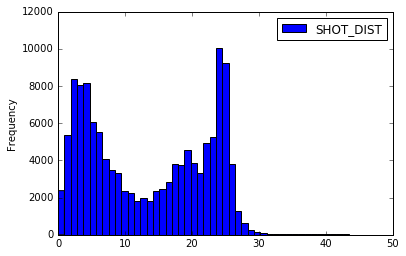

In [28]:
df.plot(kind='hist',y='SHOT_DIST',bins=50)

In [10]:
test = 'MAR 04, 2015 - CHA @ BKN'

In [11]:
team = (test.split(' - ')[1]).split(' @ ')[1]

In [12]:
team

'BKN'

In [13]:
def getOffenseTeam(input):
        if input.find('@')!=-1:
            team = (input.split(' - ')[1]).split(' @ ')[0]
            return team
        else:
            team = (input.split(' - ')[1]).split(' vs. ')[0]
            return team

def getDefenseTeam(input):
        if input.find('@')!=-1:
            team = (input.split(' - ')[1]).split(' @ ')[1]
            return team
        else:
            team = (input.split(' - ')[1]).split(' vs. ')[1]
            return team

In [14]:
df['SHOOTING_TEAM'] = df.loc[:,'MATCHUP'].apply(getOffenseTeam)

In [15]:
df['DEFENSE_TEAM']  = df.loc[:,'MATCHUP'].apply(getDefenseTeam)

In [16]:
def getTeamDF(df,team):
    df_team = df[ (df['SHOOTING_TEAM']==team)]
    return df_team

In [17]:
df_cha = getTeamDF(df,'CHA')

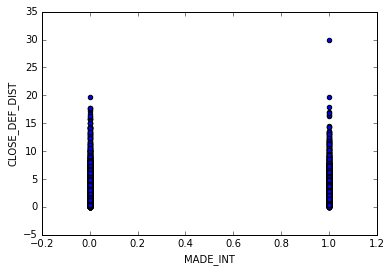

In [18]:
df_cha.plot(kind='hist',x='MADE_INT',y='CLOSE_DEF_DIST')

In [19]:
group = df_cha.loc[:,['SHOT_DIST','CLOSE_DEF_DIST']].groupby('SHOT_DIST')

In [20]:
dist=group.mean()

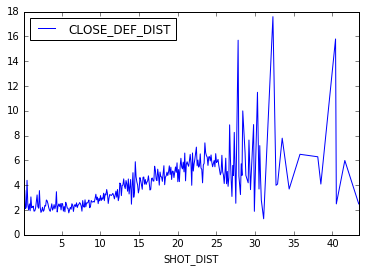

In [21]:
dist.plot()

In [22]:
acc_v_def_group = df.loc[:,['MADE_INT','CLOSE_DEF_DIST']].groupby('CLOSE_DEF_DIST')

In [23]:
acc_v_def = acc_v_def_group.mean()

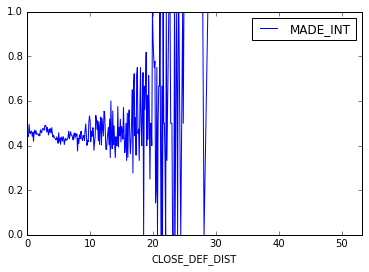

In [24]:
acc_v_def.plot()

In [29]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,MADE_INT,SHOOTING_TEAM,DEFENSE_TEAM
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,1,CHA,BKN
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,0,CHA,BKN
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0,CHA,BKN
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,0,CHA,BKN
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,0,CHA,BKN
